# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 12 - przekształcenia






### Zadanie 1

1) Utwórz macierz (zbiór punktów) reprezentującą figurę geometryczną, składającą się z minimum 4 punktów, której "punkt centralny" (na oko) znajduje się w punkcie `(0, 0)`.

2) Wyświetl utworzoną figurę na wykresie.

> Podpowiedź: możesz użyć funkcji [`plt.fill`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.fill.html)

Kolejne zadania wykonuj używając macierz utworzoną w tym zadaniu (chyba, że podano inaczej).


In [101]:
# >> UZUPEŁNIJ <<
import matplotlib.pyplot as plt
import numpy as np

my_fig = np.array([[1, 0] ,[0, 1], [-1, 0], [0, -1]])
my_fig

array([[ 1,  0],
       [ 0,  1],
       [-1,  0],
       [ 0, -1]])

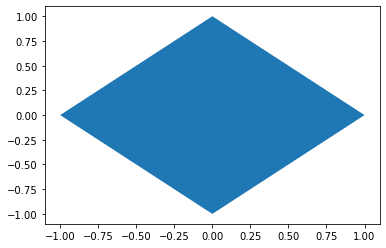

In [102]:
plt.fill(my_fig[:, 0], my_fig[:, 1])

### Zadanie 2

Aby wykonać przekształcenie należy pomnożyć macierz przekształcaną przez _mecierz przekształcenia_. Poniżej wymienione są przykładowe macierze przekształceń pozwalające wykonać tranformacje:

Obrót o kąt $\theta$:

$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta\\
\text{sin}\theta & \text{cos}\theta
\end{pmatrix}
$$

Rozciągnięcie wzdłuż osi $0x$:

$$
A_k = \begin{pmatrix}
k & 0\\
0 & 1
\end{pmatrix}
$$

Rozciągnięcie wzdłuż osi $0y$:

$$
A_k = \begin{pmatrix}
1 & 0\\
0 & k
\end{pmatrix}
$$

Rozciągnięcie w proporcji $k_x$ wzdłuż osi $0x$ i w proporcji $k_y$ wzdłuż osi $0y$:

$$
A_k = \begin{pmatrix}
k_x & 0\\
0 & k_y
\end{pmatrix}
$$

Pochylenie względem osi $0y$:

$$
A_k = \begin{pmatrix}
1 & k\\
0 & 1
\end{pmatrix}
$$

Pochylenie względem osi $0x$:

$$
A_k = \begin{pmatrix}
1 & 0\\
k & 1
\end{pmatrix}
$$



**Polecenie**

Utwórz trzy animacje dla obrotu, rozciągnięcia i pochylenia (odpowiednio).


Przykład:

<div style="display: flex; flex-direction: row; flex-wrap: wrap; justify-content: center; width:100%;">
<img src="./Figure_2_rot.gif" height="300" width="300" />
<img src="./Figure_2_strech.gif" height="300" width="300" />
<img src="./Figure_2_shear.gif" height="300" width="300" />
</div>


In [103]:
# >> UZUPEŁNIJ <<

def rotate_by(angle):
    return np.array([[np.cos(np.deg2rad(angle)), -np.sin(np.deg2rad(angle))], 
                     [np.sin(np.deg2rad(angle)), np.cos(np.deg2rad(angle))]])


def stretch_by(k, k2=None, axis='x'):
    if axis == 'x':
        return np.array([[k, 0], [0, 1]])
    elif axis == 'y':
        return np.array([[1, 0], [0, k]])
    elif axis == 'both':
        return np.array([[k, 0], [0, k2]])
    else:
        raise ValueError


def lean_by(k, axis='x'):
    if axis == 'x':
        return np.array([[1, k], [0, 1]])
    elif axis == 'y':
        return np.array([[1, 0], [k, 1]])
    else:
        raise ValueError

rotated  = my_fig @ rotate_by(45)

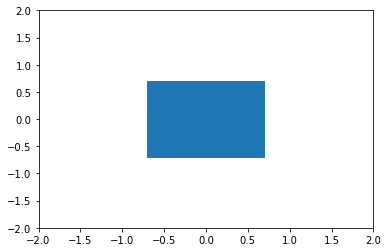

In [104]:
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.fill(rotated[:, 0], rotated[:, 1])

### Zadanie 3 (przekształcenia afiniczne)

Przekształcenia afiniczne pozwalają na wykonywanie operacji _translacji_ i łączenia jej z innymi operacjami przekształcenia. 
Aby wykonać przekształcenie afiniczne należy zmienić reprezentację punktu $(x, y) \in R^2$ na $(x, y, 1) \in R^3$. W ten sposób macierz przekształceń osiąga wymiar 3x3. Macierz pozwalająca wykonanie operacji translacji (przesunięcie o wektor $[k_x, k_y]$) wygląda wtedy następująco:

$$
A_k = \begin{pmatrix}
1 & 0 & k_x \\
0 & 1 & k_y \\
0 & 0 & 1
\end{pmatrix}
$$


Pozostałe operacje analogicznie jak wcześniej, np. operacja obrotu:

$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta & 0\\
\text{sin}\theta & \text{cos}\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

**Polecenie**

Wykonaj animację, gdzie operacja translacji oraz obrotu są wykonywane za pomocą jednej operacji macierzowej.

> Podpowiedź: należy "połączyć" macierze przekształceń w jedną.


Przykład:

<img src="./Figure_3.gif" height="300" width="300" />

array([[ 1.,  5.,  1.],
       [ 0.,  6.,  1.],
       [-1.,  5.,  1.],
       [ 0.,  4.,  1.]])

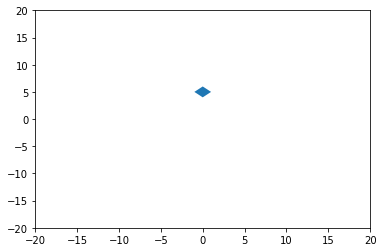

In [105]:
# >> UZUPEŁNIJ <<

def affine_transformation(kx, ky, theta):
    return np.array([[np.cos(np.deg2rad(theta)), -np.sin(np.deg2rad(theta)), kx],
                     [np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta)), ky],
                     [0, 0, 1]])

my_fig = np.c_[my_fig, np.ones(my_fig.shape[0])]

affined = my_fig @ affine_transformation(0, 5, 0).T

plt.xlim((-20, 20))
plt.ylim((-20, 20))
plt.fill(affined[:, 0], affined[:, 1])

affined

### Zadanie 4 (przekształcenia macierzowe w 3D)

1) Utwórz prostą figurę geometryczną złożoną z 8 punktów w przestrzeni 3D (podobnie jak w pierwszym zadaniu).

2) Utwórz animację obrotu figury względem osi $0z$.

> Aby wykonać taki obrót należy użyć poniższej macierzy przekształceń:
$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta & 0\\
\text{sin}\theta & \text{cos}\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

**Przykład**


<img src="./Figure_4.gif" height="300" width="300" />

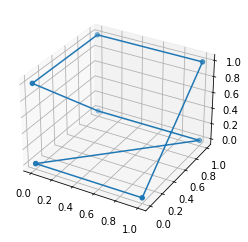

In [133]:
# >> UZUPEŁNIJ <<
# plot 3d graph of eight points

my3dfig = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 1], [0, 1, 1],
                    [0, 0, 1], [0, 1, 0], [1, 1, 0],[0, 0, 0]
                    ])

def plot3d(points):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    ax.plot(points[:, 0], points[:, 1], points[:, 2])
    plt.show()

plot3d(my3dfig)

### Zadanie 5

Połącz punkty (jeżeli nie zrobiłeś wcześniej) figury z poprzedniego zadania.

**Przykład**


<img src="./Figure_5.gif" height="300" width="300" />

In [107]:
# >> UZUPEŁNIJ <<

# Wnioski
Wszystkie zadania zostały wykonane zgodnie z założeniami.
Do generacji animacji sluza pliki plot1.py, plot2.py, plot3.py, plot4.py, plot5.py.